<a href="https://colab.research.google.com/github/VikasBelida09/SP23-Team5/blob/main/Team5_sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
path="/content/drive/MyDrive/dataset/Zoom-features-2022.xlsx"


In [4]:
dfs = pd.read_excel(path, sheet_name=["Dec-2022", "Nov-2022", "Oct-2022", "Sept-2022", "Aug-2022", "July-2022", "June-2022", "May-2022", "April-2022", "March-2022", "Feb-2022", "Jan-2022"])
merged_df = pd.concat(dfs.values(), ignore_index=True)

In [5]:
merged_df

,Group / Category,Feature Title,Feature Description,Release Date,Release Version
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494)
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216)
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216)
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216)
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216)
...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169)
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169)
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169)
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169)


In [6]:
df2=merged_df.copy()

In [7]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494)
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216)
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216)
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216)
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216)
...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169)
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169)
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169)
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169)


In [8]:
df2['Release Date'][0]

Timestamp('2022-12-27 00:00:00')

In [9]:
df2['Release Date']=pd.to_datetime(df2['Release Date'])

In [10]:
df2['Release Month']=df2['Release Date'].dt.month

In [11]:
df2 

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


<h1><b>Exploratory Data Analysis</b></h1>

<h1>Histogram shows number of features released per month</h1>

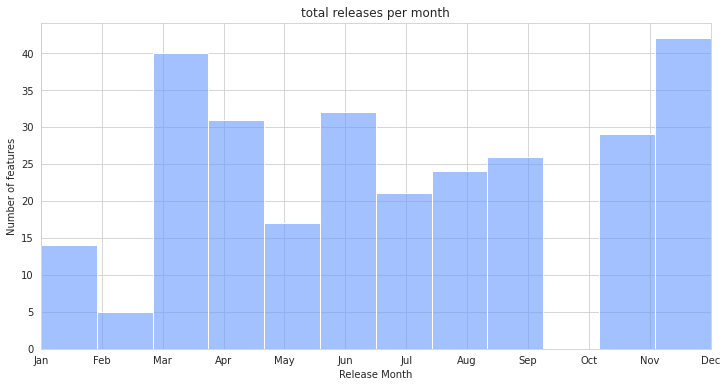

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=df2, x='Release Month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month")
plt.xlim(1,12)
plt.show()

In [13]:
summary=df2.groupby(df2['Release Month'])['Feature Title'].describe()

In [14]:
summary

,count,unique,top,freq
Release Month,,,,
1.0,14,14,Additional MSI/PLIST/GPO/MDM options: Require ...,1
2.0,5,5,Language Interpretation relay enhancement,1
3.0,40,40,Support for Apple authentication,1
4.0,31,31,Chat Etiquette Tool,1
5.0,17,17,Share Zoom Whiteboard to Zoom Chat channels,1
6.0,32,31,Support for Zoom Apps in Webinars,2
7.0,21,21,Indonesian language support,1
8.0,24,24,Enhanced access to cloud recordings,1
9.0,26,26,Profile Card enhancements,1


<h2>Figuring out how many null values are present in the feature columns</h2>

In [15]:
df2.isna().sum()

Group / Category       0
Feature Title          1
Feature Description    1
Release Date           1
Release Version        1
Release Month          1
dtype: int64

In [16]:
l=df2[df2['Feature Title'].isnull()].index.tolist()
print(len(l))

1


In [17]:
df2.iloc[[l[0]]]

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
71,(only resolved issues),NaN,NaN,NaT,NaN,NaN


<h2>It is clear that the null values are due to no data in October month. so we can remove that row</h2>

In [18]:
df2=df2.drop(l[0])

In [19]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


In [20]:
df2.isna().sum()

Group / Category       0
Feature Title          0
Feature Description    0
Release Date           0
Release Version        0
Release Month          0
dtype: int64

<h2>Now we have removed all the null rows</h2>

<h1><b>Data Preprocessing</b></h1>

<h2>1. Lowercase the text data</h2>

In [21]:
df2['Feature Title']=df2['Feature Title'].str.lower()
df2['Feature Description']=df2['Feature Description'].str.lower()

In [22]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,custom human avatars,"in addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,additional msi/plist/gpo/mdm options: disable ...,"disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,additional msi/plist/gpo/mdm options: download...,"enabled by default, when a vdi environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,additional msi/plist/gpo/mdm options: support ...,"disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,additional msi/plist/gpo/mdm options: disable ...,"enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,"users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,post-meeting virtual background auto-reversal,users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,add video to waiting room,"account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


<h1>2. Removing Stop Words and punctuations</h1>

In [23]:
nlp = spacy.load("en_core_web_sm")
def remove_stop_words(text):
  doc=nlp(text)
  no_stop_words=[token.text for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(no_stop_words)

In [24]:
df2['Feature Description']=df2['Feature Description'].apply(remove_stop_words)

In [25]:
df2['Feature Description'][0]

'addition animal avatars users create custom human avatars meetings customization options include numerous facial features colors choose'

<h1>3. Lemmatization</h1>

In [26]:
def lemmatize_text(text):
   doc=nlp(text)
   lemmatized_words=[token.lemma_ for token in doc]
   return ' '.join(lemmatized_words)

In [27]:
df2['Feature Description']=df2['Feature Description'].apply(lemmatize_text)

In [28]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,custom human avatars,addition animal avatar user create custom huma...,2022-12-27,version 5.13.3 (11494),12.0
1,General features,additional msi/plist/gpo/mdm options: disable ...,disabled default option allow admin disable us...,2022-12-20,version 5.13.0 (11216),12.0
2,General features,additional msi/plist/gpo/mdm options: download...,enable default vdi environment detect zoomplug...,2022-12-20,version 5.13.0 (11216),12.0
3,General features,additional msi/plist/gpo/mdm options: support ...,disabled default allow client support window e...,2022-12-20,version 5.13.0 (11216),12.0
4,General features,additional msi/plist/gpo/mdm options: disable ...,enable default allow admin disable desktop cli...,2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,user quickly blur background need access zoom ...,2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,post-meeting virtual background auto-reversal,user select use virtual background zoom meetin...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout room long need closed order rename ad...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,add video to waiting room,account owner admin user add video customizing...,2022-01-24,version 5.9.3 (3169),1.0


<h1>Feature Extraction</h1>

In [29]:
tfidf_vectorizer = TfidfVectorizer()

In [30]:
tfidf = tfidf_vectorizer.fit_transform(df2['Feature Description'])

In [31]:
print(tfidf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.31238481]
 ...
 [0.         0.         0.         ... 0.         0.07460912 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.22946565 0.        ]]


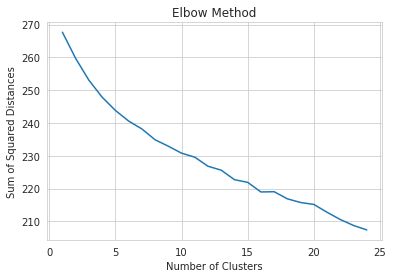

In [51]:
ssd = []
for k in range(1,25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 25), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [49]:
cluster_labels = kmeans.labels_
for cluster_id in range(11):
    print(f"Documents in Cluster {cluster_id}:")
    cluster_docs = df2['Feature Description'][cluster_labels == cluster_id]
    ldocs=cluster_docs.tolist()
    for doc in ldocs:
      print(doc)
    print("="*50)

Documents in Cluster 0:
host co host create edit poll meet previously create editing poll launch web portal change macos user feature require macos version 10.12 high
end end encrypt meeting support 1000 total participant previously maximum 200 participant large meeting add requirement apply
collaborate whiteboard live meeting participant request follow specific editor request follow follow view canvas tie view canvas
meet whiteboard user few collaboration cursor cursor label participant control collaborate whiteboard inactive cursor disappear active user enable disable view collaborator cursor view whiteboard
additional shape available meeting whiteboard experience include pentagon hexagon octagon heart arrow cloud star previously shape add meeting experience
meet whiteboard dashboard access click whiteboard tab client follow client light dark theme
host launch collaborate zoom whiteboard zoom webinar
meeting host adjust behavior begin share whiteboard meet host participant interrupt 

In [68]:
cutoff_date = pd.to_datetime('2022-06-30')
df2['label']=df2['Release Date'].apply(lambda x: 'old' if x<=cutoff_date else 'New')

In [69]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month,label
0,Meeting features,custom human avatars,addition animal avatar user create custom huma...,2022-12-27,version 5.13.3 (11494),12.0,New
1,General features,additional msi/plist/gpo/mdm options: disable ...,disabled default option allow admin disable us...,2022-12-20,version 5.13.0 (11216),12.0,New
2,General features,additional msi/plist/gpo/mdm options: download...,enable default vdi environment detect zoomplug...,2022-12-20,version 5.13.0 (11216),12.0,New
3,General features,additional msi/plist/gpo/mdm options: support ...,disabled default allow client support window e...,2022-12-20,version 5.13.0 (11216),12.0,New
4,General features,additional msi/plist/gpo/mdm options: disable ...,enable default allow admin disable desktop cli...,2022-12-20,version 5.13.0 (11216),12.0,New
...,...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,user quickly blur background need access zoom ...,2022-01-24,version 5.9.3 (3169),1.0,old
278,Meeting/webinar features,post-meeting virtual background auto-reversal,user select use virtual background zoom meetin...,2022-01-24,version 5.9.3 (3169),1.0,old
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout room long need closed order rename ad...,2022-01-24,version 5.9.3 (3169),1.0,old
280,Meeting features,add video to waiting room,account owner admin user add video customizing...,2022-01-24,version 5.9.3 (3169),1.0,old


In [70]:
df2['label'].value_counts()

New    142
old    139
Name: label, dtype: int64

In [71]:
df2['label']=df2['label'].apply(lambda x: 1 if x=='New' else 0)


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf, df2.label, test_size=0.25, random_state=41)


In [94]:
df2['label']

0      1
1      1
2      1
3      1
4      1
      ..
277    0
278    0
279    0
280    0
281    0
Name: label, Length: 281, dtype: int64

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision tree accuracy on testing set:", accuracy)

Decision tree accuracy on testing set: 0.5211267605633803


In [96]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Use the classifier to predict the labels for the testing data
predicted_labels = clf.predict(X_test)

# Calculate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, predicted_labels)

print('Naive Bayes Classifier Accuracy:', accuracy)

Naive Bayes Classifier Accuracy: 0.6338028169014085


In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# evaluate accuracy on testing data
pred_y = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
print("Logistic regression accuracy:", accuracy)

Logistic regression accuracy: 0.647887323943662


In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Test the classifier on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6056338028169014
